In [20]:
import pandas as pd
import sqlite3

# Load CSV with explicit encoding
# Using 'latin1' or 'ISO-8859-1' encoding which is more permissive than UTF-8
df = pd.read_csv("C:/users/ASUS/Downloads/archive/Sample - Superstore.csv", encoding='latin1')

# Create SQLite connection
conn = sqlite3.connect("superstore.db")

# Write to SQL table
df.to_sql("sales", conn, if_exists="replace", index=False)



9994

In [21]:
# Example SQL queries
query1 = "SELECT COUNT(*) FROM sales;"
query2 = "SELECT Region, SUM(Sales) AS TotalSales FROM sales GROUP BY Region;"
query3 = "SELECT Category, AVG(Profit) AS AvgProfit FROM sales GROUP BY Category ORDER BY AvgProfit DESC;"

# Execute and display
print(pd.read_sql(query2, conn))


    Region   TotalSales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245


In [22]:
import pandas as pd
import sqlite3

# Connect to the same SQL database
conn = sqlite3.connect("superstore.db")

# Read data from the sales table
df = pd.read_sql("SELECT * FROM sales", conn)

# View first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:


# 1. Check for missing values
print(df.isnull().sum())

# 2. Drop duplicates (if any)
df = df.drop_duplicates()

# 3. Convert date column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 4. Check data types
print(df.dtypes)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity    

In [24]:
print(df.describe())


            Row ID                     Order Date   Postal Code         Sales  \
count  9994.000000                           9994   9994.000000   9994.000000   
mean   4997.500000  2016-04-30 00:07:12.259355648  55190.379428    229.858001   
min       1.000000            2014-01-03 00:00:00   1040.000000      0.444000   
25%    2499.250000            2015-05-23 00:00:00  23223.000000     17.280000   
50%    4997.500000            2016-06-26 00:00:00  56430.500000     54.490000   
75%    7495.750000            2017-05-14 00:00:00  90008.000000    209.940000   
max    9994.000000            2017-12-30 00:00:00  99301.000000  22638.480000   
std    2885.163629                            NaN  32063.693350    623.245101   

          Quantity     Discount       Profit  
count  9994.000000  9994.000000  9994.000000  
mean      3.789574     0.156203    28.656896  
min       1.000000     0.000000 -6599.978000  
25%       2.000000     0.000000     1.728750  
50%       3.000000     0.200000    

In [25]:

region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print(region_sales)


               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


In [26]:

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


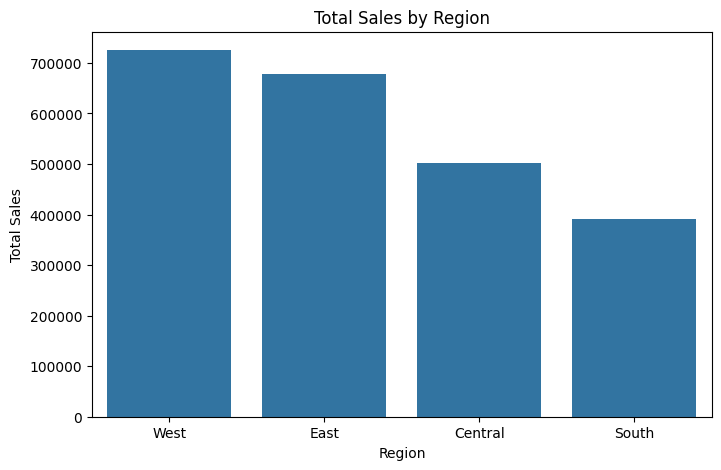

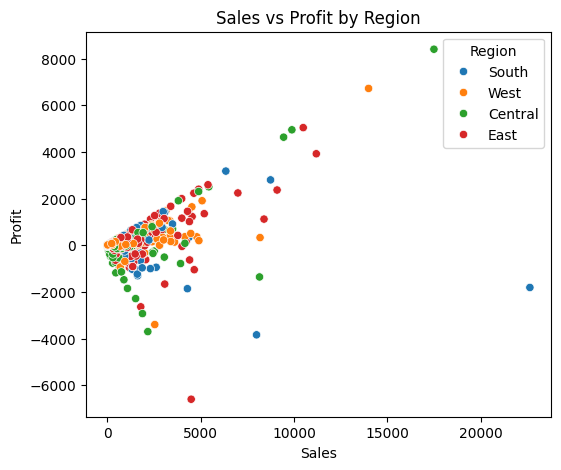

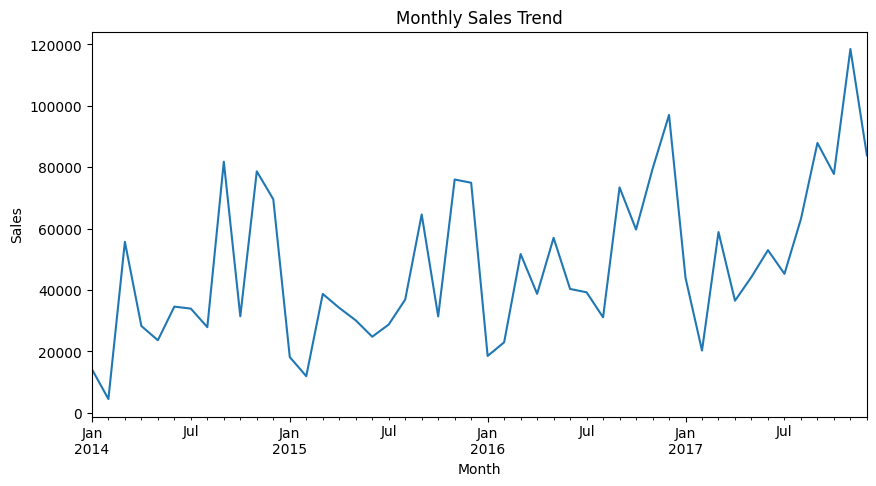

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create region_sales first ---
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# 1. Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# 2. Sales vs Profit Relationship
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Region")
plt.title("Sales vs Profit by Region")
plt.show()

# 3. Monthly Sales Trend
df['Order Date'] = pd.to_datetime(df['Order Date'])  # ensure it's datetime
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()





In [28]:

##The West region contributed the highest total sales.”

##“Technology category has the highest profit margin.”

##“Sales peaked during November–December.”

##“There’s a positive correlation between discount and sales volume.

In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Select features and target
features = df[['Sales', 'Discount']]
target = df['Profit']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: -0.7036572232316536
Mean Absolute Error: 66.13897562000416


In [34]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   0.25431358 -209.74004461]
Intercept: 6.191766761547431


In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales = monthly_sales.to_timestamp()


2018-01-01    75259.028176
2018-02-01    73306.800103
2018-03-01    72862.101712
2018-04-01    72760.803785
2018-05-01    72737.729111
2018-06-01    72732.472927
Freq: MS, Name: predicted_mean, dtype: float64


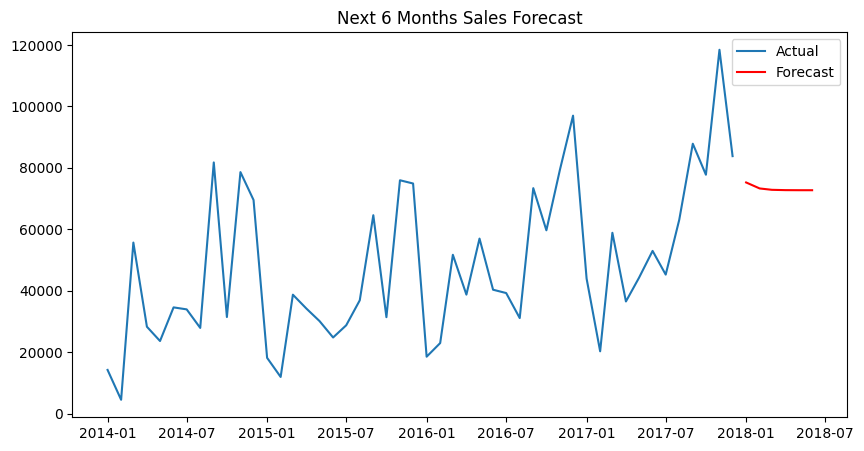

In [ ]:

# Then import the required modules
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit model
model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
print(forecast)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Next 6 Months Sales Forecast")
plt.legend()
plt.show()

In [ ]:
df.to_csv("cleaned_superstore.csv", index=False)
